In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='sex', ylabel='count'>

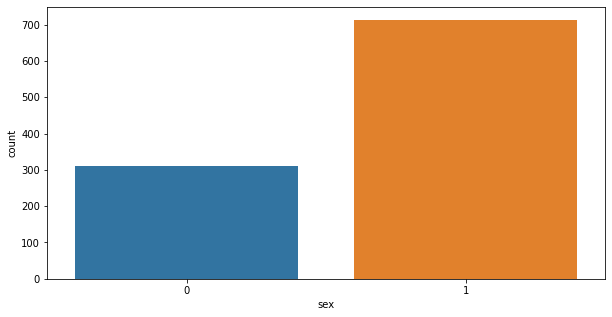

In [7]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'sex', data = df)

In [8]:
## Checking for null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Figure size 1440x1440 with 0 Axes>

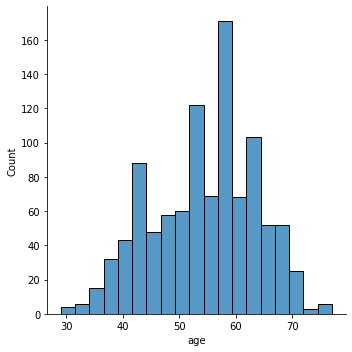

In [9]:
## distribution plot for the age column

plt.figure(figsize = (20,20))
sns.displot(df['age'])

<AxesSubplot:>

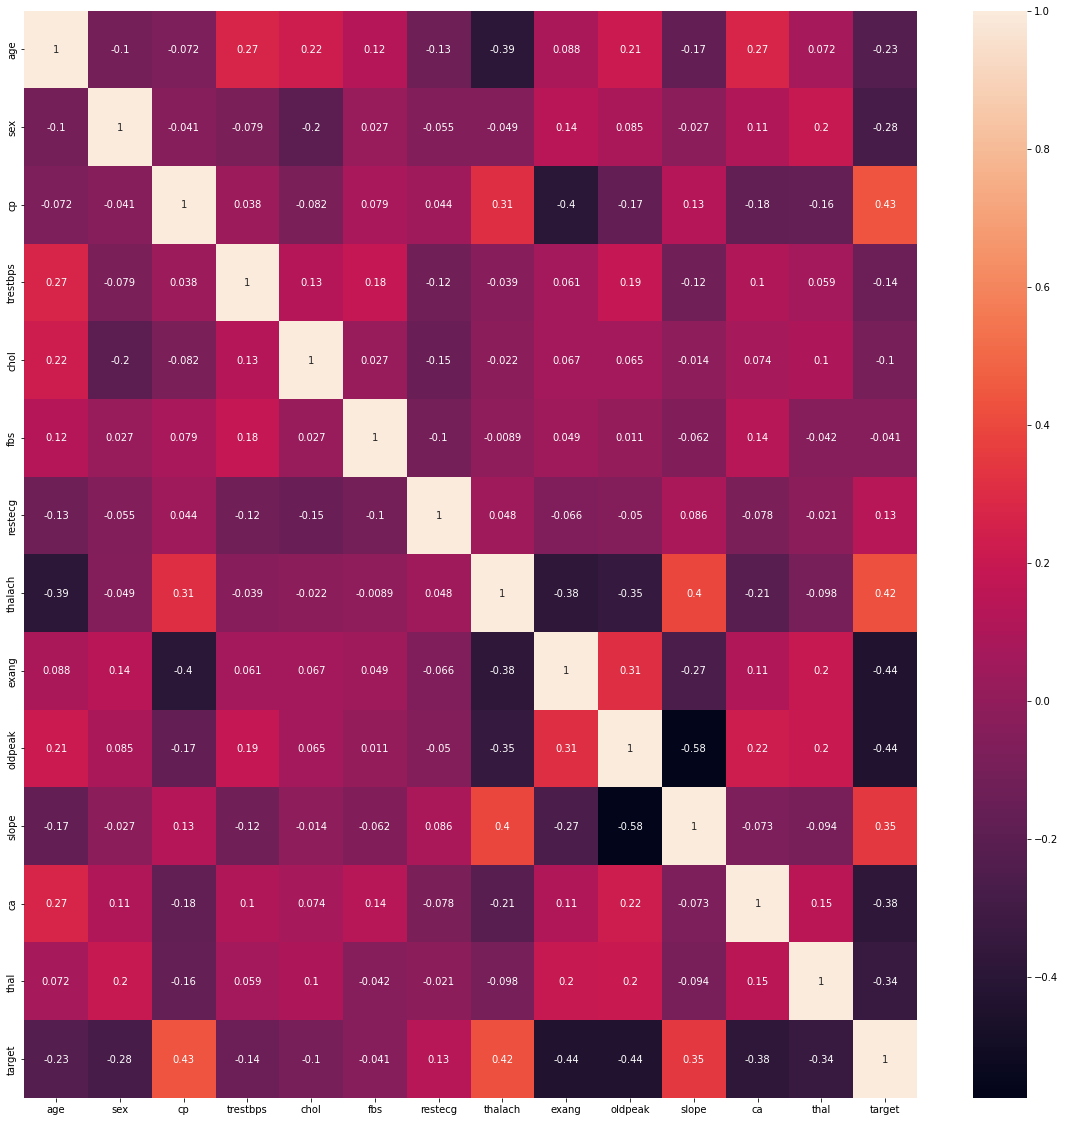

In [10]:
## Check for correlation among features

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


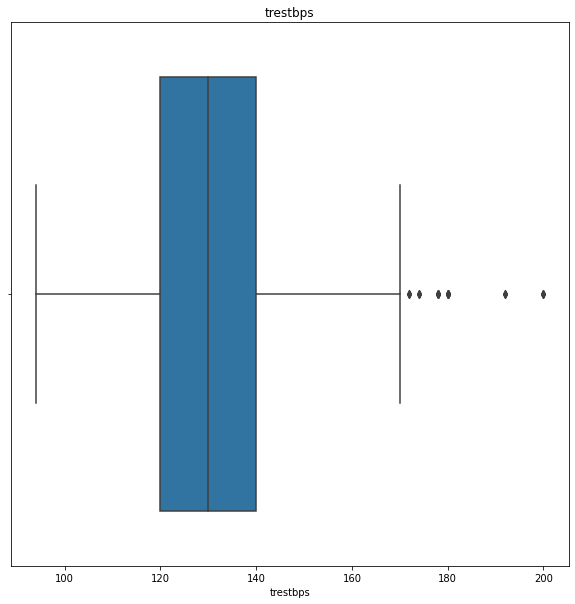

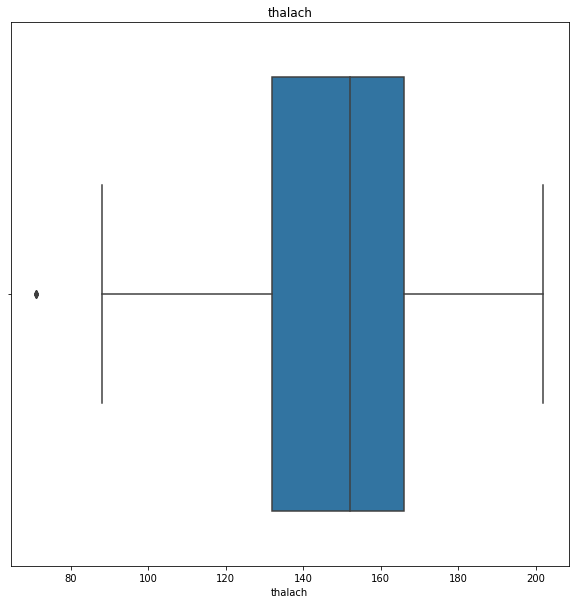

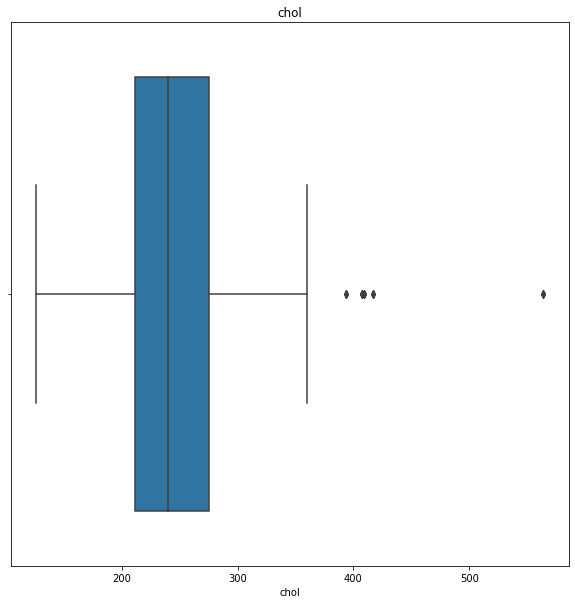

In [11]:
## Check for outliers

for f in ['trestbps', 'thalach', 'chol' ]:
    plt.figure(figsize = (10,10))
    sns.boxplot(df[f])
    plt.title(f)

<Figure size 720x720 with 0 Axes>

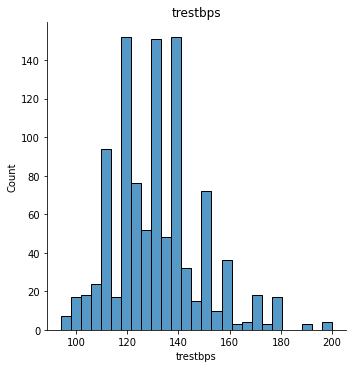

<Figure size 720x720 with 0 Axes>

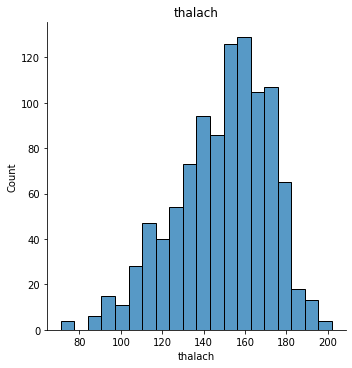

<Figure size 720x720 with 0 Axes>

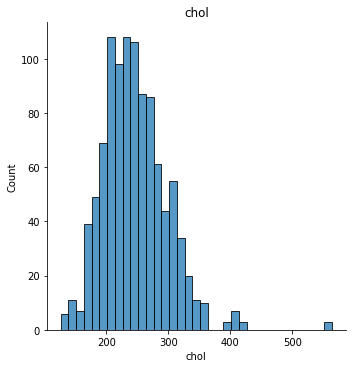

In [12]:
## distribution plot for trestbps, thalach and chol columns
for f in ['trestbps', 'thalach', 'chol']:
    plt.figure(figsize = (10,10))
    sns.displot(df[f])
    plt.title(f)

In [13]:
## Now since most of the columns are following gaussian distribution, we're going to remove the outliers using 3rd std

def rem_outlier(df, feature):
    lower_bound = df[feature].mean() - 3*df[feature].std()
    upper_bound = df[feature].mean() + 3*df[feature].std()
    
    df.loc[df[feature] < lower_bound , feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [14]:
for f in ['trestbps', 'chol', 'thalach', 'age']:
    rem_outlier(df, f)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


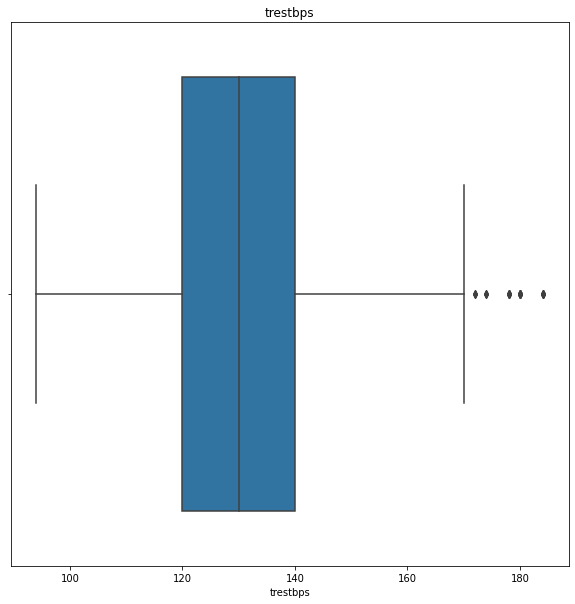

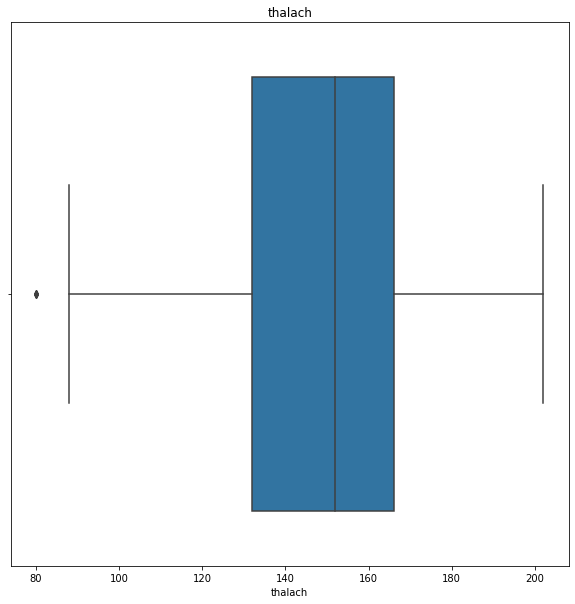

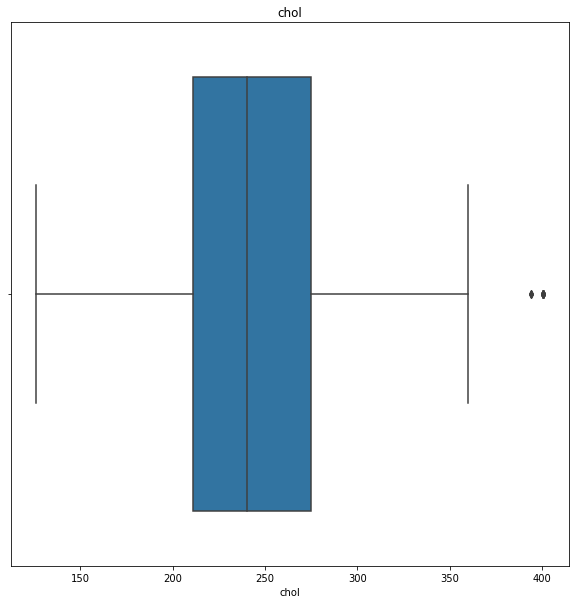

In [15]:
for f in ['trestbps', 'thalach', 'chol']:
    plt.figure(figsize = (10,10))
    sns.boxplot(df[f])
    plt.title(f)

In [16]:
## Dependent and Independent features

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [17]:
## Now we'll convert these features into numpy array

X = X.values
y = y.values

In [18]:
X, y

(array([[52.,  1.,  0., ...,  2.,  2.,  3.],
        [53.,  1.,  0., ...,  0.,  0.,  3.],
        [70.,  1.,  0., ...,  0.,  0.,  3.],
        ...,
        [47.,  1.,  0., ...,  1.,  1.,  2.],
        [50.,  0.,  0., ...,  2.,  0.,  2.],
        [54.,  1.,  0., ...,  1.,  1.,  3.]]),
 array([0, 0, 0, ..., 0, 1, 0]))

In [19]:
## It's time for scaling of X

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
X

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [21]:
## Now splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [23]:
## Now applying Logistic Regression to our data

from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
prediction = lr.predict(X_test)

In [26]:
pd.DataFrame({'Actual' : y_test, 'Predicted' : prediction})

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
200,1,1
201,1,1
202,1,1
203,0,0


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

0.8048780487804879
              precision    recall  f1-score   support

           0       0.87      0.72      0.78       102
           1       0.76      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

[[73 29]
 [11 92]]


In [29]:
## Now we'll try support vector classifier

from sklearn.svm import SVC

In [30]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [31]:
preds = svc.predict(X_test)

In [32]:
print(accuracy_score(y_test, preds))

0.8878048780487805


In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [34]:
pd.DataFrame({'Actual' : y_test, 'Predicted' : preds})

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
200,1,1
201,1,1
202,1,1
203,0,0


In [35]:
### Among the two classifiers SVC performs better than logistic regression 